# 201758101 배성규
### 빅데이터 과제3. 회귀

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [102]:
bankData = pd.read_csv('HW3.csv', index_col = 0) # index_col = 0안하면 값 scatter에서 이상하게 나옴

In [103]:
bankData

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13.364,3838,296,5,65,17,Male,No,No,African American,480
398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


### 1) 파일을 읽어 데이터프레임을 생성하고 처음 3개의 샘플을 출력하시오. 특성의 개수와 샘플(관측치)의 개수를 구하고 결측치가 있는지 알아보시오. 수치형 특성과 범주형 특성은 무엇인지 파악하시오.

In [104]:
bankData.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [105]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [143]:

print(bankData['Income'].unique())
print(bankData['Limit'].unique())
print(bankData['Rating'].unique())
print(bankData['Cards'].unique())
print(bankData['Age'].unique())
print(bankData['Education'].unique())
print(bankData['Gender'].unique())
print(bankData['Student'].unique())
print(bankData['Married'].unique())
print(bankData['Ethnicity'].unique()) 
print(bankData['Balance'].unique())
 
# 결측치 없다! 
# 특성개수 : 10개


[ 14.891 106.025 104.593 148.924  55.882  80.18   20.996  71.408  15.125
  71.061  63.095  15.045  80.616  43.682  19.144  20.089  53.598  36.496
  49.57   42.079  17.7    37.348  20.103  64.027  10.742  14.09   42.471
  32.793 186.634  26.813  34.142  28.941 134.181  31.367  20.15   23.35
  62.413  30.007  11.795  13.647  34.95  113.659  44.158  36.929  31.861
  77.38   19.531  44.646  44.522  43.479  36.362  39.705  44.205  16.304
  15.333  32.916  57.1    76.273  10.354  51.872  35.51   21.238  30.682
  14.132  32.164  12.    113.829  11.187  27.847  49.502  24.889  58.781
  22.939  23.989  16.103  33.017  30.622  20.936 110.968  15.354  27.369
  53.48   23.672  19.225  43.54  152.298  55.367  11.741  15.56   59.53
  20.191  48.498  30.733  16.479  38.009  14.084  14.312  26.067  36.295
  83.851  21.153  17.976  68.713 146.183  15.846  12.031  16.819  39.11
 107.986  13.561  34.537  28.575  46.007  69.251  16.482  40.442  35.177
  91.362  27.039  23.012  27.241 148.08   62.602  11.8

### 2 수치형 특성과 레이블에 대하여는 히스토그램을 작성하고 범주형 특성에 대하여는 막대그래프를 작성하고 간단히 코멘트 하시오.

Text(0.5, 1.0, 'Gender')

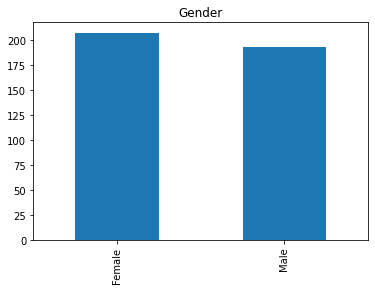

In [107]:
# Gender, Student, Married, Ethnicity (범주형)
# Income, Limit, Rating, Cards, Age, Education (수치형) 

bankData['Gender'].value_counts().plot.bar()
plt.title('Gender')

Text(0.5, 1.0, 'Student')

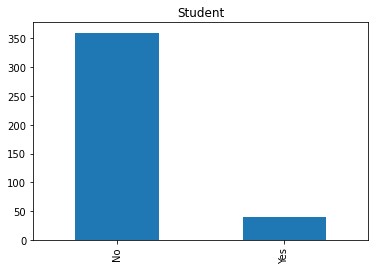

In [108]:
bankData['Student'].value_counts().plot.bar()
plt.title('Student')

Text(0.5, 1.0, 'Married')

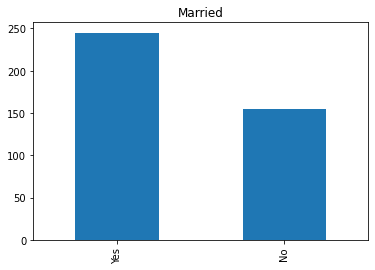

In [109]:
bankData['Married'].value_counts().plot.bar()
plt.title('Married')


Text(0.5, 1.0, 'Ethnicity')

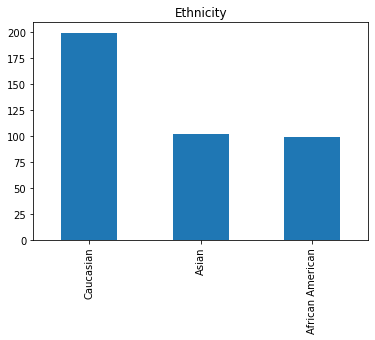

In [110]:
bankData['Ethnicity'].value_counts().plot.bar()
plt.title('Ethnicity')

(array([163., 103.,  52.,  30.,  14.,  14.,   8.,   7.,   5.,   4.]),
 array([ 10.354,  27.982,  45.61 ,  63.238,  80.866,  98.494, 116.122,
        133.75 , 151.378, 169.006, 186.634]),
 <BarContainer object of 10 artists>)

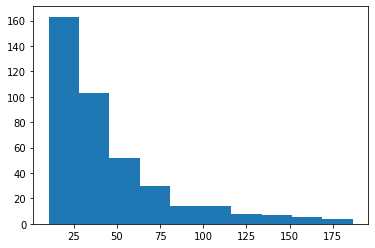

In [111]:
plt.hist(bankData['Income'], bins = 10)

(array([51., 78., 84., 93., 42., 28., 11.,  8.,  3.,  2.]),
 array([  855. ,  2160.8,  3466.6,  4772.4,  6078.2,  7384. ,  8689.8,
         9995.6, 11301.4, 12607.2, 13913. ]),
 <BarContainer object of 10 artists>)

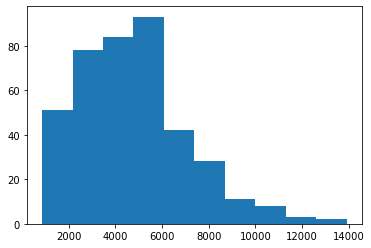

In [112]:
plt.hist(bankData['Limit'], bins = 10)

(array([51., 79., 86., 91., 47., 23., 11.,  6.,  4.,  2.]),
 array([ 93. , 181.9, 270.8, 359.7, 448.6, 537.5, 626.4, 715.3, 804.2,
        893.1, 982. ]),
 <BarContainer object of 10 artists>)

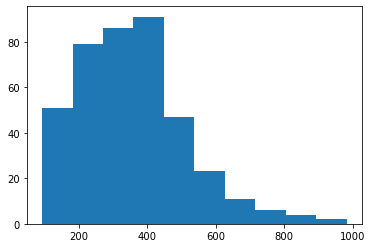

In [113]:
plt.hist(bankData['Rating'], bins = 10)

(array([ 51., 115., 111.,  72.,   0.,  34.,  11.,   4.,   1.,   1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

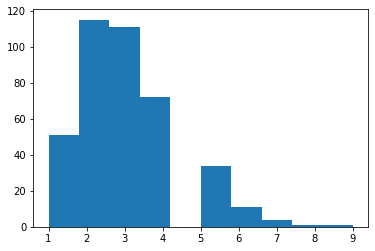

In [114]:
plt.hist(bankData['Cards'], bins = 10)

(array([32., 43., 52., 58., 49., 49., 53., 46., 16.,  2.]),
 array([23. , 30.5, 38. , 45.5, 53. , 60.5, 68. , 75.5, 83. , 90.5, 98. ]),
 <BarContainer object of 10 artists>)

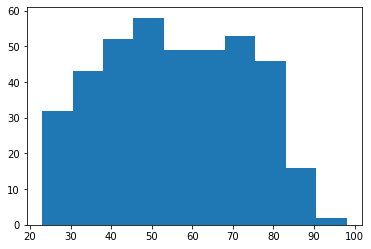

In [115]:
plt.hist(bankData['Age'], bins = 10)

(array([ 6.,  8., 39., 24., 70., 38., 97., 50., 56., 12.]),
 array([ 5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. , 18.5, 20. ]),
 <BarContainer object of 10 artists>)

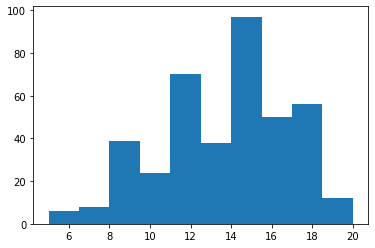

In [116]:
plt.hist(bankData['Education'], bins = 10)

(array([138.,  45.,  53.,  47.,  48.,  32.,  21.,  11.,   3.,   2.]),
 array([   0. ,  199.9,  399.8,  599.7,  799.6,  999.5, 1199.4, 1399.3,
        1599.2, 1799.1, 1999. ]),
 <BarContainer object of 10 artists>)

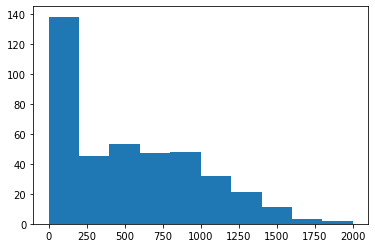

In [117]:
plt.hist(bankData['Balance'], bins = 10)

 - 학생이 아닌 고객이 만흥ㅁ

# 3) 상관관계 파악하기

In [118]:
bankData.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


 - Limit과 Rating이 강한 양의 상관관계를 보임 
 - Income - Limit, Income과 Rating도 강한 양의 상관관계를 보인다. 

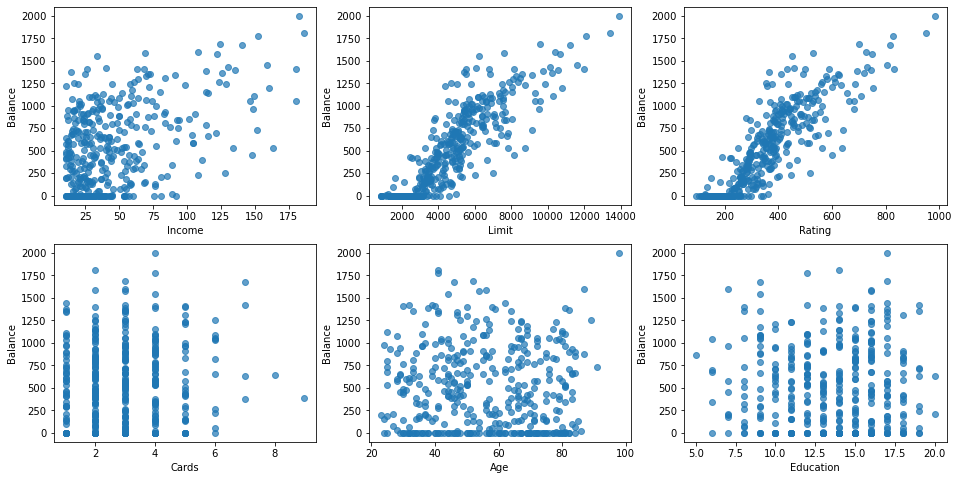

In [119]:
plt.figure(figsize = (16,8))
for i in range(1, 7):
    plt.subplot(2,3,i)
    plt.scatter(bankData.iloc[:, i-1], bankData.iloc[:,10], alpha= 0.7)
    plt.xlabel(bankData.columns[i-1])
    plt.ylabel(bankData.columns[10])

 - Limit와 Rating이 밸런스와 강한 양의 상관괸계를 보임. 

# 5) Rating(신용점수) 변수를 특성으로 하고 Balance(잔고) 변수를 레이블로 하는 단순선형회귀모형을 훈련하고 산점도에 회귀직선식을 표시하고 이 모형의 결정계수()을 구하시오.

In [120]:
X = bankData.loc[:, 'Rating'].to_numpy()

In [121]:
X = X.reshape(X.shape[0], 1)
X.shape

(400, 1)

In [122]:
y = bankData['Balance'].to_numpy()

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
reg1 = LinearRegression()

In [125]:
reg1.fit(X, y)

LinearRegression()

In [126]:
reg1.coef_

array([2.56624033])

In [127]:
reg1.intercept_

-390.8463417872381

In [128]:
pred = reg1.predict(X)

In [129]:
score = reg1.score(X, y)

In [130]:
score

0.7458484180585037

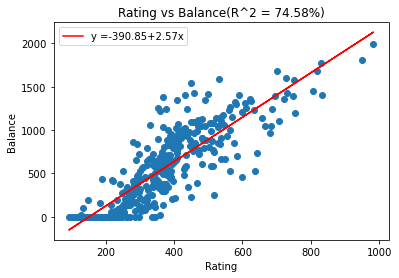

In [131]:
plt.scatter(X, y)
plt.xlabel('Rating')
plt.ylabel('Balance')
eq = 'y =' + str(round(reg1.intercept_,2)) + '+' +str(round(reg1.coef_[0],2)) + 'x'
plt.plot(X, pred, color='red', label=eq)
plt.title('Rating vs Balance' + '(R^2 = '+ str(round(score,4)*100) + '%)')
plt.legend();

- 결정계수의 의미 : rating으로 balance(에 있는 변동)의 74.58퍼센트를 설명함
- 회귀직선식 : Balance = 390.85 + 2.57(Rating)

# 6) 수치형 특성들만 포함하여 데이터를 훈련용과 테스트용으로 7:3으로 분할(random_state=0)하여 선형회귀모형을 훈련시키고 훈련데이터와 테스트데이터에 대한 결정계수를 구하시오. 과대적합이나 과소적합이 의심되는지 코멘트 하시오. Income이 100, Limit가 6000, Rating이 550, Card가 5개, 나이가 55, 교육년수가 20인 사람의 잔고를 예측하시오.

In [132]:
X = bankData.iloc[:, :6].values

In [133]:
y = bankData['Balance'].values

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 0)

In [136]:
reg2 = LinearRegression()

In [137]:
reg2.fit(X_train, y_train)

LinearRegression()

In [138]:
reg2.coef_

array([-7.90523312,  0.15976222,  1.56900826, 14.42490726, -0.60836095,
        2.94113733])

In [139]:
reg2.intercept_

-486.6594364191833

In [140]:
print(reg2.score(X_train, y_train))
print(reg2.score(X_test, y_test))

0.8857073035585357
0.8557914117915563


 - 훈련데이터에 대한 결정계수 ==> 0.8857로 1에 가깝기 때문에 과소적합이 아니다. 테스트셋에 대한 결정계수가 트레이닝셋과 크게 차이나지 않기 때문에 과대적합으로도 볼 수 없다. 

In [141]:
new_ex = [100, 6000, 550, 5, 55, 20]
new_case = np.array(new_ex).reshape(1,6)
reg2.predict(new_case)

array([641.83257176])

In [142]:
reg2.intercept_+np.dot(reg2.coef_, new_ex) 

641.8325717615619